# Country Clusters

In this notebook we will use a dataset of socio-economic and health factors by country to group countries based on their overall development levels. This could then be used to identify countries that are more in need of humanitarian aid. The dataset can be downloaded from https://www.kaggle.com/rohan0301/unsupervised-learning-on-country-data?select=data-dictionary.csv .

This exercise will involve using a set of unsupervised learning techniques to cluster the countries.

### Data Exploration

Let's first import and explore the dataset:

In [1]:
#Import libraries
import pandas as pd
import numpy as np

In [2]:
#Import dataset
raw_data = pd.read_csv('Country-data.csv')

In [3]:
raw_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
#Import description of each of the features in the dataset
column_meaning = pd.read_csv('data-dictionary.csv')

In [5]:
column_meaning

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services per capita. Give...
3,health,Total health spending per capita. Given as %ag...
4,imports,Imports of goods and services per capita. Give...
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of t...
7,life_expec,The average number of years a new born child w...
8,total_fer,The number of children that would be born to e...
9,gdpp,The GDP per capita. Calculated as the Total GD...


In [6]:
raw_data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [7]:
#Check if there are any missing data in the dataset
raw_data.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

Let's now visualise the data by plotting histograms for each feature:

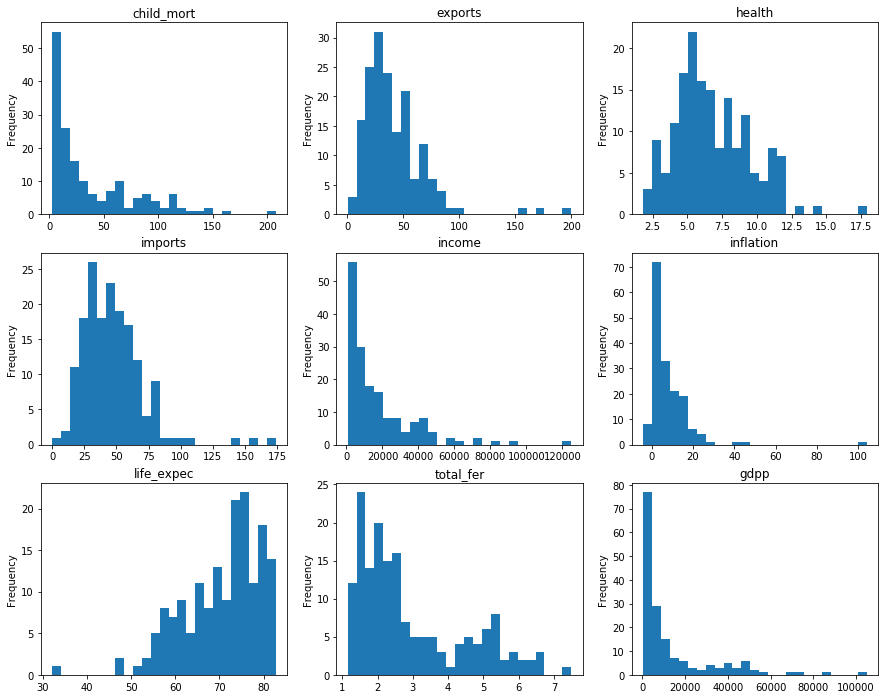

In [11]:
import math
import matplotlib.pyplot as plt
n_row = 3 
n_col = 3
fig, axes = plt.subplots(n_row, n_col,figsize=(15,12))
for i in range(raw_data.shape[1]-1):
    raw_data.iloc[:,i+1].plot.hist(bins=25,ax=axes[math.floor(i/n_row),i-n_col*math.floor(i/n_row)],title=raw_data.columns.values[i+1])

plt.show()

Potential outliers:

In [12]:
raw_data[raw_data.life_expec==min(raw_data.life_expec)]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
66,Haiti,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662


In [13]:
raw_data[raw_data.inflation==max(raw_data.inflation)]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
113,Nigeria,130.0,25.3,5.07,17.4,5150,104.0,60.5,5.84,2330


Do exports and imports tell much about country development level? The top countries seem to be small nations whose economy is largely dependent on the trading of goods:

In [14]:
raw_data.sort_values('exports',ascending=False).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000
98,Malta,6.8,153.0,8.65,154.0,28300,3.830,80.3,1.36,21100
73,Ireland,4.2,103.0,9.19,86.5,45700,-3.220,80.4,2.05,48700
131,Seychelles,14.4,93.8,3.40,108.0,20400,-4.210,73.4,2.17,10800


In [15]:
raw_data.sort_values('imports',ascending=False).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600
98,Malta,6.8,153.0,8.65,154.0,28300,3.830,80.3,1.36,21100
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000
131,Seychelles,14.4,93.8,3.40,108.0,20400,-4.210,73.4,2.17,10800
87,Lesotho,99.7,39.4,11.10,101.0,2380,4.150,46.5,3.30,1170


We will now plot a pairplot and a correlation heatmap to assess the pairwise relationships in the dataset:

C:\Users\Alex\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


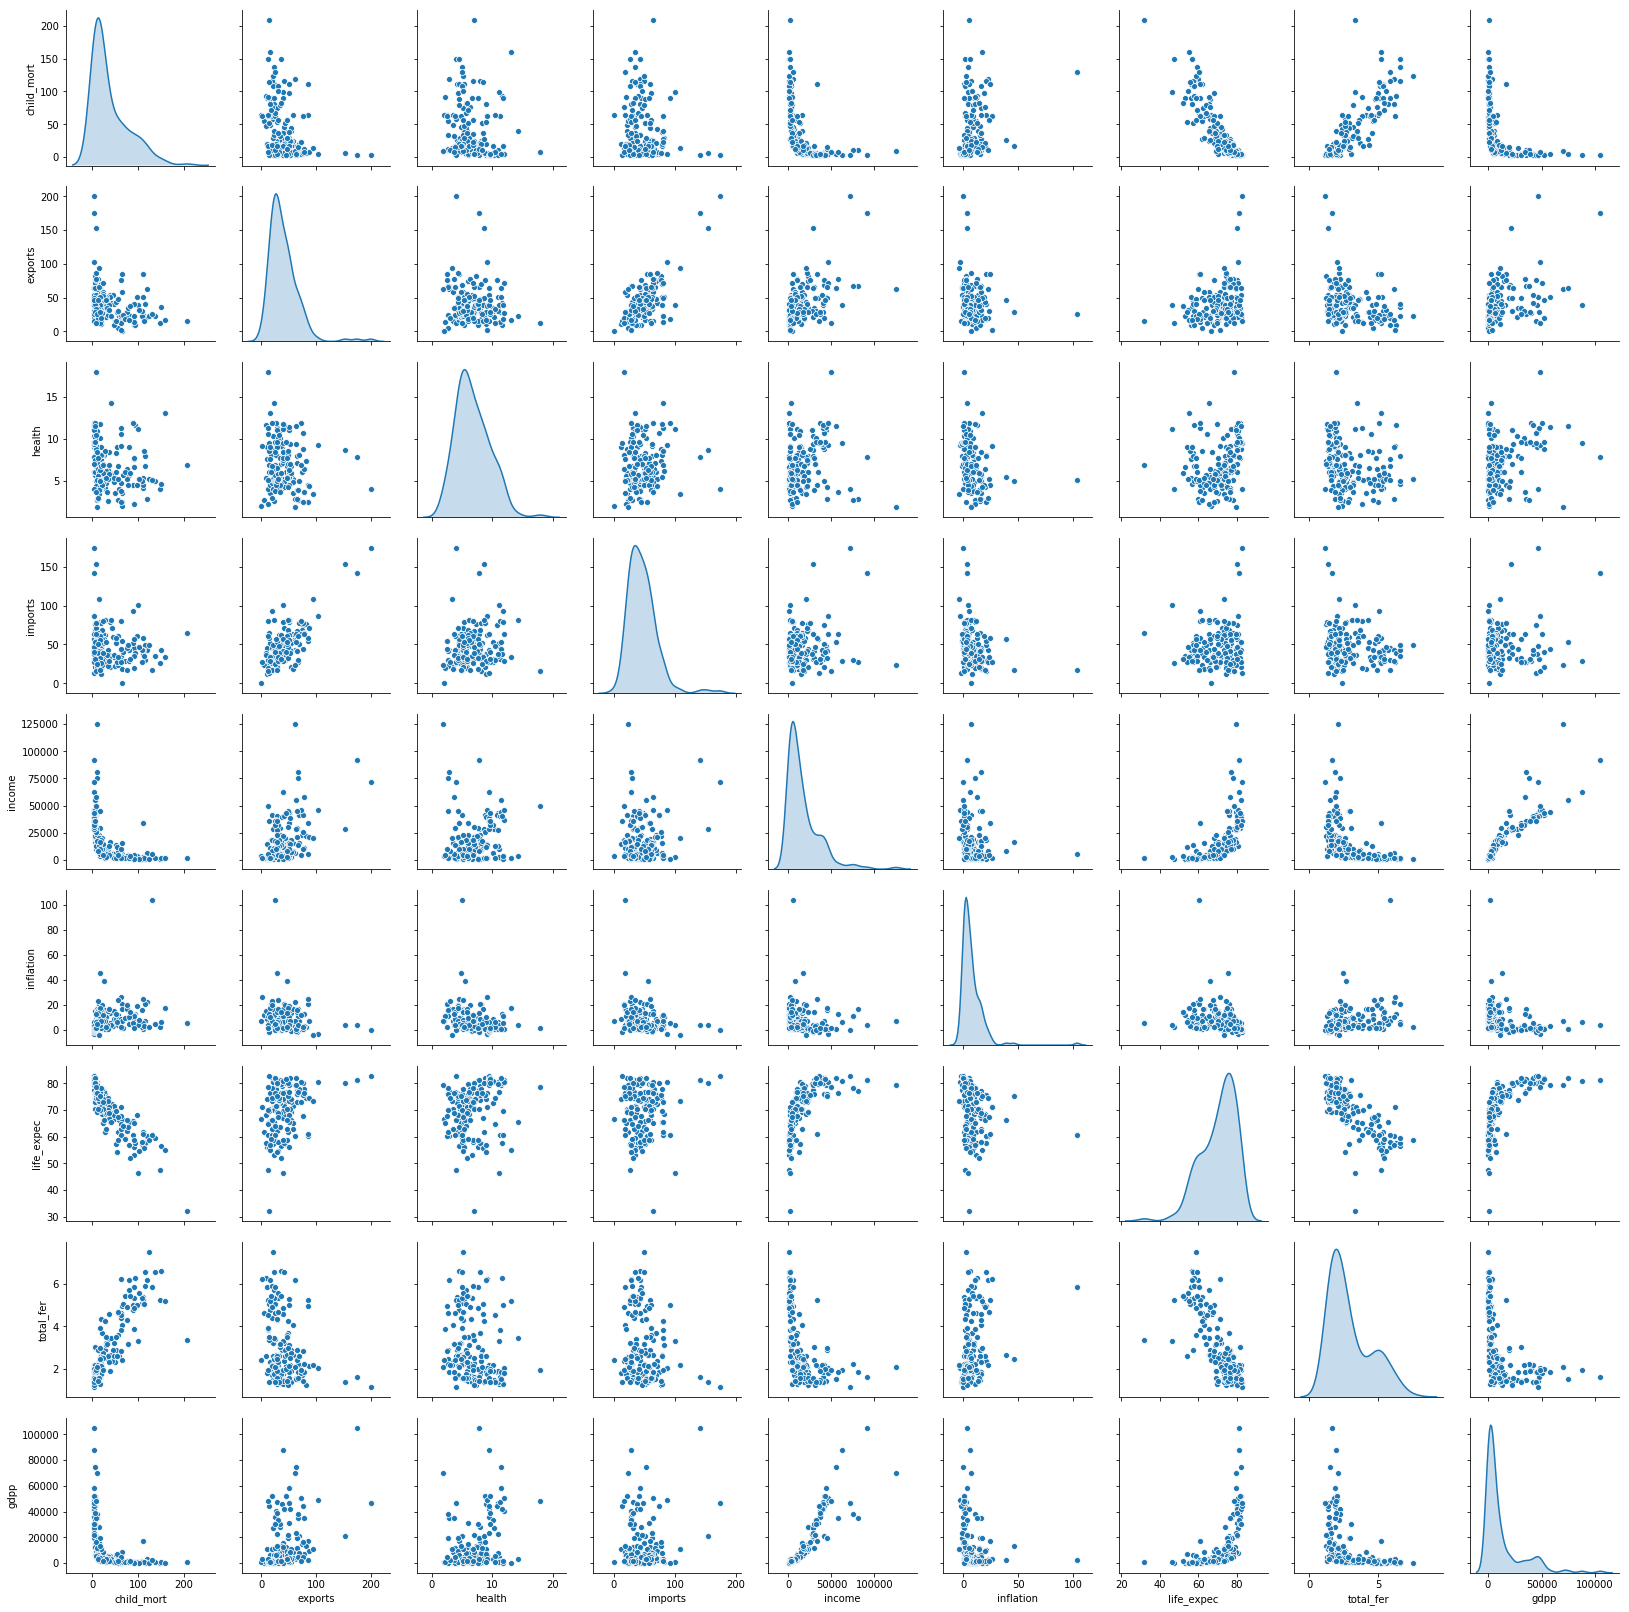

In [16]:
import seaborn as sns
pair_plot = sns.pairplot(raw_data,diag_kind='kde')

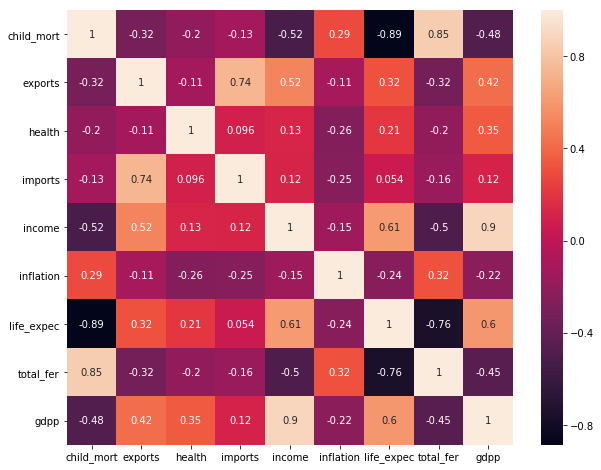

In [17]:
plt.figure(figsize=(10,8))
sns.heatmap(raw_data.corr(),annot=True)
plt.show()

As expected, there is a strong postive correlation between some of the variables, like child mortality and fertility and imports and exports. At the same time, there is a strong negative correlation between life expectancy and child mortality and between life expectancy and fertility. Finally, life expectancy has a positive correlation with the income and GDP/Capita levels.

### Feature Scaling

We will begin by mean normalising the data so that all features have bounded values and a mean of 0:

In [18]:
data_norm = raw_data.set_index('country') #make country column the index

In [19]:
data_norm = raw_data.set_index('country') #make country column the index
data_norm = data_norm.apply(lambda x: (x-np.mean(x))/(np.max(x)-np.min(x)))  #feature scaling

In [20]:
data_norm.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02
mean,2.775558e-17,-3.924422e-17,-2.379999e-16,4.645319e-17,-1.662011e-17,-1.869762e-18,6.082958e-17,6.648042e-18,7.645248e-18
std,1.963434e-01,1.371348e-01,1.707171e-01,1.391883e-01,1.549796e-01,9.768694e-02,1.754077e-01,2.387772e-01,1.749440e-01
min,-1.736614e-01,-2.051117e-01,-3.111056e-01,-2.692072e-01,-1.329332e-01,-1.108200e-01,-7.584948e-01,-2.835905e-01,-1.215355e-01
25%,-1.461541e-01,-8.659207e-02,-1.178178e-01,-9.595712e-02,-1.108576e-01,-5.518743e-02,-1.036625e-01,-1.818555e-01,-1.110458e-01
50%,-9.235667e-02,-3.056154e-02,-3.080725e-02,-2.064124e-02,-5.775891e-02,-2.210362e-02,5.018366e-02,-8.485238e-02,-7.926157e-02
75%,1.160172e-01,5.123304e-02,1.108957e-01,6.818551e-02,4.546399e-02,2.742970e-02,1.231620e-01,1.470088e-01,1.036418e-02
max,8.263386e-01,7.948883e-01,6.888944e-01,7.307928e-01,8.670668e-01,8.891800e-01,2.415052e-01,7.164095e-01,8.784645e-01


### PCA

Let's know perform a principal component analysis (PCA) on the scaled data. This will help to reduce the dimensionality of the dataset that will be used to train the clustering models. It will also help us visualise the data and the clusters.

As discussed above, the imports and exports variables are more likely to be associated with the size of different countries and the types of their economies rather than with the degree of overall development of countries. For this reason, we will remove these two features from the dataset.

In [21]:
#Remove imports and exports from data
data_norm_red = data_norm.drop(columns=['imports','exports'])

In [22]:
#Run PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=7)

pca.fit(data_norm_red)

PCA(copy=True, iterated_power='auto', n_components=7, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [23]:
#View percentage of variance explained by each principal component
np.cumsum(pca.explained_variance_ratio_)

array([0.6268425 , 0.77678069, 0.89518551, 0.94156273, 0.97710473,
       0.99134741, 1.        ])

The first 5 components explain almost 98% of the variance.

In [24]:
def pca_results(data, pca):
    #Create a DataFrame of the PCA results (explained variance and feature weights) and visualise PCA
    
    # Dimension indexing
    dimensions = dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]

    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns = list(data.keys()))
    components.index = dimensions

    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
    variance_ratios.index = dimensions

    # Create a bar plot visualization
    fig, ax = plt.subplots(figsize = (14,8))

    # Plot the feature weights as a function of the components
    components.plot(ax = ax, kind = 'bar');
    ax.set_ylabel("Feature Weights")
    ax.set_xticklabels(dimensions, rotation=0)


    # Display the explained variance ratios
    for i, ev in enumerate(pca.explained_variance_ratio_):
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n          %.4f"%(ev))

    # Return a concatenated DataFrame
    return pd.concat([variance_ratios, components], axis = 1)

,Explained Variance,child_mort,health,income,inflation,life_expec,total_fer,gdpp
Dimension 1,0.6268,0.4873,-0.1437,-0.3053,0.0886,-0.4308,0.5831,-0.3393
Dimension 2,0.1499,0.2682,0.5354,0.3717,-0.0275,-0.0773,0.3907,0.5864
Dimension 3,0.1184,0.0783,-0.7980,0.4519,0.1627,0.0524,0.1682,0.3089
Dimension 4,0.0464,0.4013,-0.0745,0.1369,-0.3315,-0.5791,-0.5987,0.1045
Dimension 5,0.0355,0.1322,0.1567,0.0640,0.9203,-0.1396,-0.2947,-0.0230
Dimension 6,0.0142,-0.6909,0.0408,0.2418,0.0334,-0.6493,0.1826,-0.0802
Dimension 7,0.0087,0.1688,0.1553,0.6950,-0.0832,0.1709,0.0194,-0.6540


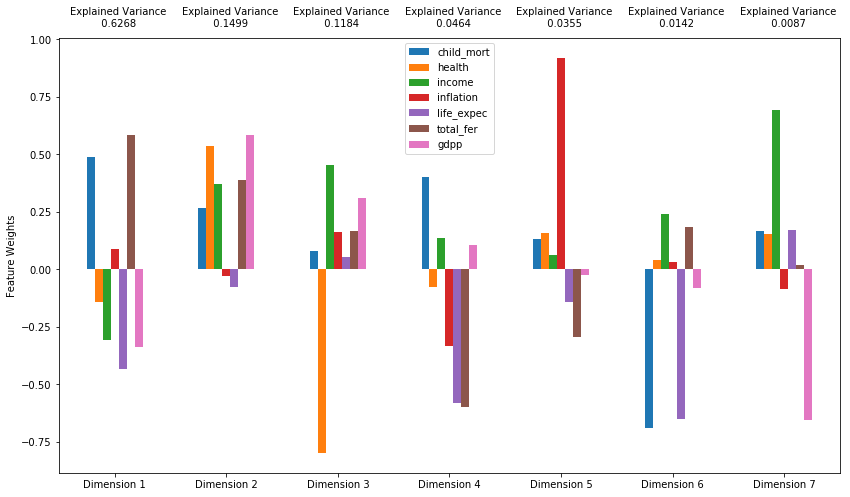

In [25]:
pca_results(data_norm_red,pca)

We will keep the first 5 components:

In [26]:
pca = PCA(n_components=5)
pca.fit(data_norm_red)
data_pca = pca.transform(data_norm_red)

## K-Means Clustering

A k-means clustering algorithm can be now run on the PCA data:

In [27]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 

We will use what is called the elbow method to find the optimal number of clusters. To do this, we will run the k-means algorithm for different numbers of clusters, K, and then plot the silhoutte scores of the resulting clusters against the corresponding values of K.

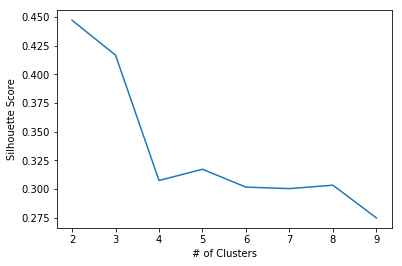

In [28]:
k_values = []
scores = []

for k in range(2,10):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data_pca)
    k_values.append(k)
    scores.append(silhouette_score(data_pca,kmeans.labels_))
    
ax = plt.plot(k_values,scores)
plt.xlabel('# of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

Best clustering is obtained using K=2. 2-3 clusters appears to be the optimal solution. We will stick with K=2.

In [29]:
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(data_pca)
data_clustered = raw_data 
data_clustered['cluster'] = kmeans.labels_

In [30]:
data_clustered.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1


Let's try to visualise the clusters using a scatter plot of the two most important principal components found above:

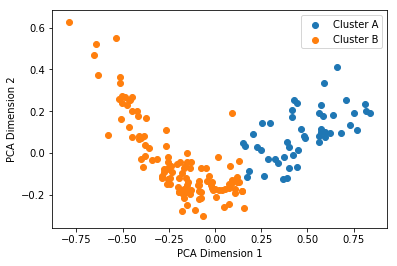

In [31]:
plt.scatter(data_pca[np.where(kmeans.labels_==0)][:,0],data_pca[np.where(kmeans.labels_==0)][:,1])
plt.scatter(data_pca[np.where(kmeans.labels_==1)][:,0],data_pca[np.where(kmeans.labels_==1)][:,1])

plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')
plt.legend(['Cluster A', 'Cluster B'])
plt.show()

In [32]:
print('Number of countries in Cluster A: {}'.format(len(data_clustered[data_clustered.cluster==0].country)))
print('Number of countries in Cluster B: {}'.format(len(data_clustered[data_clustered.cluster==1].country)))

Number of countries in Cluster A: 50
Number of countries in Cluster B: 117


From the plot above it looks like the main differentiating factor between the two clusters is the value of the first principal component. We will order the countries based on this value to try to understand what the two clusters represent:

In [33]:
data_clustered.loc[np.argsort(data_pca[:,0])].country

91                   Luxembourg
145                 Switzerland
114                      Norway
123                       Qatar
133                   Singapore
159               United States
8                       Austria
110                 Netherlands
44                      Denmark
77                        Japan
58                      Germany
29                       Canada
144                      Sweden
7                     Australia
75                        Italy
73                      Ireland
15                      Belgium
53                      Finland
139                       Spain
54                       France
68                      Iceland
158              United Kingdom
60                       Greece
23                       Brunei
122                    Portugal
42                       Cyprus
138                 South Korea
82                       Kuwait
135                    Slovenia
98                        Malta
                 ...           
149     

It can be seen that at the top we have some of the countries with the highest GDP/Capita, Income, Life Expectancy and Health while at the bottom we have poorer countries with lower life expectancy, high child mortality rates and higher fertility. In other words, the top of the list includes wealthy countries that have a low value of the fist principal component found above and the bottom has countries with higher values of the first principal component.

Despite the slightly lower silhouette score when K=3, it would make sense to try to split the countries in 3 commonly used categories: developed, developing and underdeveloped countries. Let's try this: 

In [34]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(data_pca)
data_clustered = raw_data 
data_clustered['cluster'] = kmeans.labels_

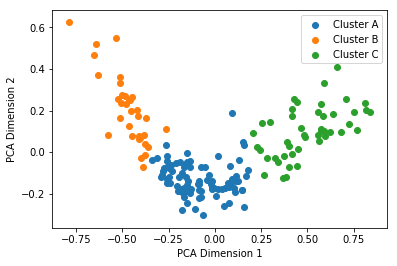

In [35]:
plt.scatter(data_pca[np.where(kmeans.labels_==0)][:,0],data_pca[np.where(kmeans.labels_==0)][:,1])
plt.scatter(data_pca[np.where(kmeans.labels_==1)][:,0],data_pca[np.where(kmeans.labels_==1)][:,1])
plt.scatter(data_pca[np.where(kmeans.labels_==2)][:,0],data_pca[np.where(kmeans.labels_==2)][:,1])
plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')
plt.legend(['Cluster A', 'Cluster B', 'Cluster C'])
plt.show()

It can be seen that we now have a 3rd group in the middle which represents countries that are not too underdeveloped but are not very rich either. Some examples of such developing countries are:

In [36]:
data_clustered.loc[np.where(kmeans.labels_==0)].country.sample(15)

14                            Belarus
141    St. Vincent and the Grenadines
137                      South Africa
48                        El Salvador
22                             Brazil
13                           Barbados
104                        Montenegro
46                            Ecuador
100                         Mauritius
20             Bosnia and Herzegovina
2                             Algeria
57                            Georgia
39                         Costa Rica
5                           Argentina
164                           Vietnam
Name: country, dtype: object

In [37]:
print('Number of countries in Cluster A: {}'.format(len(data_clustered[data_clustered.cluster==0].country)))
print('Number of countries in Cluster B: {}'.format(len(data_clustered[data_clustered.cluster==1].country)))
print('Number of countries in Cluster C: {}'.format(len(data_clustered[data_clustered.cluster==2].country)))

Number of countries in Cluster A: 88
Number of countries in Cluster B: 33
Number of countries in Cluster C: 46


Let's visualise the 3 clusters for some pairs of the original features in the dataset:

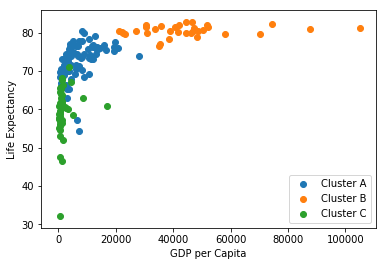

In [38]:
plt.scatter(data_clustered[data_clustered.cluster==0].gdpp,data_clustered[data_clustered.cluster==0].life_expec)
plt.scatter(data_clustered[data_clustered.cluster==1].gdpp,data_clustered[data_clustered.cluster==1].life_expec)
plt.scatter(data_clustered[data_clustered.cluster==2].gdpp,data_clustered[data_clustered.cluster==2].life_expec)
plt.xlabel('GDP per Capita')
plt.ylabel('Life Expectancy')
plt.legend(['Cluster A', 'Cluster B', 'Cluster C'])
plt.show()

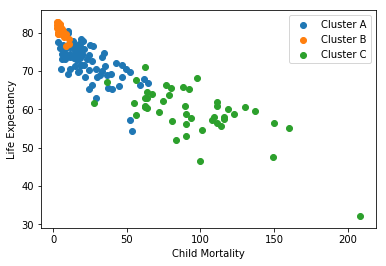

In [39]:
plt.scatter(data_clustered[data_clustered.cluster==0].child_mort,data_clustered[data_clustered.cluster==0].life_expec)
plt.scatter(data_clustered[data_clustered.cluster==1].child_mort,data_clustered[data_clustered.cluster==1].life_expec)
plt.scatter(data_clustered[data_clustered.cluster==2].child_mort,data_clustered[data_clustered.cluster==2].life_expec)
plt.xlabel('Child Mortality')
plt.ylabel('Life Expectancy')
plt.legend(['Cluster A', 'Cluster B', 'Cluster C'])
plt.show()

From the above charts it becomes apparent that:
* Cluster B represents high-income, developed countries with high life expectancy and good living standards
* Cluster A represents mid-income, developing countries that sit in the middle of the wealthiest and poorest countries in terms of living standards 
* Cluster C represents the poorest and most underdeveloped countries

In [40]:
#save results to csv
data_clustered[['country','cluster']].set_index('country').sort_values('cluster').to_csv('results.csv')

Let's now see how many countries in each continent belong to each of the 3 clusters:

In [41]:
#load country lookup table
country_lookups = pd.read_csv('country-lookups.csv')

In [42]:
#add continents to data_clustered DataFrame
data_clustered = data_clustered.merge(country_lookups,how='left',left_on='country',right_on='Country').drop(['Country'],axis=1)

In [43]:
#create pivot table with count of countries in each cluster by continent
cluster_continents = pd.get_dummies(data_clustered,columns=['cluster']).rename(columns={'cluster_0':'Mid','cluster_1':'High','cluster_2':'Low'})
cluster_continents = pd.pivot_table(cluster_continents, index=['Continent'],values=['High','Mid','Low'],aggfunc=np.sum)

In [44]:
cluster_continents

,High,Low,Mid
Continent,,,
Africa,0,37,10
Asia,9,6,30
Europe,20,0,19
North America,2,1,12
Oceania,2,2,5
South America,0,0,12


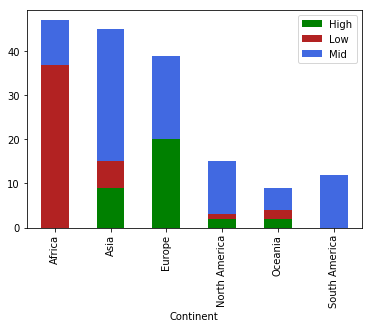

In [45]:
cluster_continents.plot(kind="bar", stacked=True, color=['green', 'firebrick', 'royalblue'])
plt.show()

* Most of the low-income countries are in Africa, followed by Asia. 
* In contrast most of the high-income countries are in Europe. 
* Middle-income, emerging countries are scattered across the world with the majority being located in Asia.

---

## Hierarchical Clustering

Let's also try using another clustering method called hierarchical clustering and compare the results with those obtained using the K-means algorithm:

In [50]:
from sklearn.cluster import AgglomerativeClustering
agg_clustering = AgglomerativeClustering(linkage='ward',n_clusters=3)
agg_clustering.fit(data_pca)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=3,
            pooling_func='deprecated')

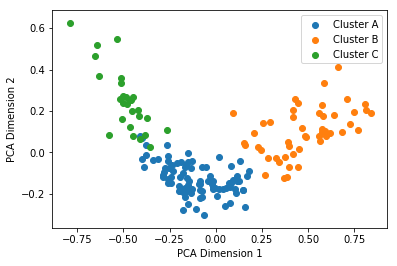

In [51]:
plt.scatter(data_pca[np.where(agg_clustering.labels_==0)][:,0],data_pca[np.where(agg_clustering.labels_==0)][:,1])
plt.scatter(data_pca[np.where(agg_clustering.labels_==1)][:,0],data_pca[np.where(agg_clustering.labels_==1)][:,1])
plt.scatter(data_pca[np.where(agg_clustering.labels_==2)][:,0],data_pca[np.where(agg_clustering.labels_==2)][:,1])
plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')
plt.legend(['Cluster A', 'Cluster B', 'Cluster C'])
plt.show()

In [52]:
print('Silhouette Score of KMeans clustering with 3 clusters: {:.4f}'.format(silhouette_score(data_pca,kmeans.labels_)))
print('Silhouette Score of hierarchical clustering with 3 clusters: {:.4f}'.format(silhouette_score(data_pca,agg_clustering.labels_)))

Silhouette Score of KMeans clustering with 3 clusters: 0.4168
Silhouette Score of hierarchical clustering with 3 clusters: 0.4211


In [53]:
agg_labels = agg_clustering.labels_
agg_labels[agg_labels==1]=3 
agg_labels[agg_labels==2]=1 
agg_labels[agg_labels==3]=2
diff_clusters = data_clustered[kmeans.labels_ != agg_labels][['country','cluster']].rename(columns={'cluster':'kmeans'})
diff_clusters['hierarchical'] = agg_labels[kmeans.labels_ != agg_labels]
diff_clusters.replace({0:'Developing',1:'Developed',2:'Underdeveloped'})

,country,kmeans,hierarchical
21,Botswana,Developing,Underdeveloped
42,Cyprus,Developed,Developing
60,Greece,Developed,Developing
98,Malta,Developed,Developing
101,"Micronesia, Fed. Sts.",Developing,Underdeveloped
122,Portugal,Developed,Developing
135,Slovenia,Developed,Developing
137,South Africa,Developing,Underdeveloped
138,South Korea,Developed,Developing


Looking at the charts and the table above, it can be seen that there are only 9 countries where the KMeans and the hierarchical clustering result in different classifications. All the cases are close to the boundaries of developed or underdeveloped countries with developing countries (i.e. there are no cases where one clustering algorithm says the country is developed and the other says it is underdeveloped).

By comparing the predictions of the two algorithms for the 9 countries with the official country classification by the United Nations (https://www.un.org/development/desa/dpad/wp-content/uploads/sites/45/WESP2019_BOOK-ANNEX-en.pdf) it looks like the kmeans algorithm results in a more accurate classifications. For example, Greece and Cyprus are developed economies according to UN while South Africa is classified as a developing economy. 

For this reason, and despite its slightly lower silhouette score, we will use the clusters obtained using the k-means algorithm as our final clusters.

## Rand Score - Comparison with UN Classifications

United Nations also provide their own country classification (see link above). We will use what is the called the Rand Index to compare the similarity of the clusters obtained using the k-means algorithm with the UN groupings.

In particular, UN provides two sets of classification. The first one groups the countries into 3 categories: Developed, In Transition, Developing. The second groups them in 4 categories: High, Upper-Middle, Lower-Middle, Low income. 

In [54]:
#load UN classification tables
un_1 = pd.read_excel('WESP1.xlsx')
un_2 = pd.read_excel('WESP2.xlsx')

In [55]:
un_1.Classification.unique()

array(['Developed', 'In Transition', 'Developing'], dtype=object)

In [56]:
len(un_1.Classification.unique())

3

In [57]:
un_2.Classification.unique()

array(['High-income', 'Upper-middle-income', 'Lower-middle-income',
       'Low-income'], dtype=object)

In [58]:
len(un_2.Classification.unique())

4

In [59]:
#Make Country the index in the two dataframes 
un_1 = un_1.set_index('Country')
un_2 = un_2.set_index('Country')

In [60]:
#combine the two UN groupings into a single dataframe
un_clusters = pd.DataFrame()
un_clusters['country'] = data_norm_red.index.values
un_clusters = un_clusters.set_index('country')
un_clusters = un_clusters.join(un_1).rename(columns={'Classification':'UN_1'})
un_clusters = un_clusters.join(un_2).rename(columns={'Classification':'UN_2'})

In [61]:
un_clusters.head(10)

,UN_1,UN_2
country,,
Afghanistan,Developing,Low-income
Albania,In Transition,Upper-middle-income
Algeria,Developing,Upper-middle-income
Angola,Developing,Lower-middle-income
Antigua and Barbuda,NaN,NaN
Argentina,Developing,High-income
Armenia,In Transition,Upper-middle-income
Australia,Developed,High-income
Austria,Developed,High-income


Let's now compute the Rand score between our k-means and hierarchical clustering and the two UN classifications.

In [62]:
from sklearn.metrics import adjusted_rand_score

kmeans_rand_un1 = adjusted_rand_score(kmeans.labels_,un_clusters.UN_1.factorize()[0])
kmeans_rand_un2 = adjusted_rand_score(kmeans.labels_,un_clusters.UN_2.factorize()[0])

agg_rand_un1 = adjusted_rand_score(agg_clustering.labels_,un_clusters.UN_1.factorize()[0])
agg_rand_un2 = adjusted_rand_score(agg_clustering.labels_,un_clusters.UN_2.factorize()[0])

print('K-means clustering')
print('Adjusted Rand score compared to UN_1 (Developed, In Transition, Developing classification): {:.4f}'.format(kmeans_rand_un1))
print('Adjusted Rand score compared to UN_2 (High, Upper-Middle, Lower-Middle, Low income classification): {:.4f}'.format(kmeans_rand_un2))

print()

print('Hierarchical clustering')
print('Adjusted Rand score compared to UN_1 (Developed, In Transition, Developing classification): {:.4f}'.format(agg_rand_un1))
print('Adjusted Rand score compared to UN_2 (High, Upper-Middle, Lower-Middle, Low income classification): {:.4f}'.format(agg_rand_un2))

K-means clustering
Adjusted Rand score compared to UN_1 (Developed, In Transition, Developing classification): 0.1492
Adjusted Rand score compared to UN_2 (High, Upper-Middle, Lower-Middle, Low income classification): 0.2919

Hierarchical clustering
Adjusted Rand score compared to UN_1 (Developed, In Transition, Developing classification): 0.1092
Adjusted Rand score compared to UN_2 (High, Upper-Middle, Lower-Middle, Low income classification): 0.2254


Note that the the second UN classification groups the countries in 4 groups, while we have groupped them in only 3. To get a more sensible comparison, we will try to combine the 'Lower-middle' and 'Low income' groups into a single category and see whether we can get a better Rand score:

In [63]:
un_clusters['UN_3'] = un_clusters['UN_2']
un_clusters['UN_3'] = un_clusters['UN_3'].apply(lambda x: 'Lower-middle & Low income' if (x=='Low-income') or (x=='Lower-middle-income') else x) 

In [64]:
kmeans_rand_un3 = adjusted_rand_score(kmeans.labels_,un_clusters.UN_3.factorize()[0])
print('Adjusted Rand score compared to UN_3 (High, Upper-Middle, Lower-Middle & Low income income classification): {:.4f}'.format(kmeans_rand_un3))

Adjusted Rand score compared to UN_3 (High, Upper-Middle, Lower-Middle & Low income income classification): 0.2956


In [65]:
un_clusters['kmeans'] = kmeans.labels_

In [66]:
un_clusters.to_csv('classification.csv')

## K-Means on Raw Data

Finally, let's try running the K-means algorithm on the raw dataset in order to see what the impact of the various pre-processing steps (e.g. normalisation, PCA) was on the quality of the clustering:

In [67]:
kmeans_raw = KMeans(n_clusters=3, random_state=0)
kmeans_raw.fit(raw_data.drop('country',axis=1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [68]:
#Check how similar the classification is to the one on PCA reduced data
adjusted_rand_score(kmeans_raw.labels_,kmeans.labels_)

0.379321092256104

In [69]:
pd.DataFrame(kmeans_raw.labels_).to_csv('raw_class.csv')

In [70]:
len(kmeans_raw.labels_[kmeans_raw.labels_==2])

32

In [71]:
print('Number of countries in Cluster A: {}'.format(len(kmeans_raw.labels_[kmeans_raw.labels_==0])))
print('Number of countries in Cluster B: {}'.format(len(kmeans_raw.labels_[kmeans_raw.labels_==1])))
print('Number of countries in Cluster B: {}'.format(len(kmeans_raw.labels_[kmeans_raw.labels_==2])))

Number of countries in Cluster A: 7
Number of countries in Cluster B: 128
Number of countries in Cluster B: 32


In [72]:
raw_class = pd.DataFrame(kmeans_raw.labels_).set_index(data_norm_red.index.values).rename(columns={0:'cluster'})

In [73]:
raw_class[raw_class.cluster==0]

,cluster
Brunei,0
Kuwait,0
Luxembourg,0
Norway,0
Qatar,0
Singapore,0
Switzerland,0


In [74]:
raw_class[raw_class.cluster==1].sample(5)

,cluster
Seychelles,1
Gambia,1
Guinea-Bissau,1
China,1
Comoros,1


In [75]:
raw_class[raw_class.cluster==2].sample(5)

,cluster
New Zealand,2
Portugal,2
Belgium,2
Iceland,2
Cyprus,2


If we use the K-Means clustering algorithm on the raw data we get a very small group of the wealthiest countries, a much larger group of the low and lower-middle income countries and a third group of the remaining high-income countries. This does not seem to be very useful for this application

Therefore, it is concluded that the pre-processing steps have helped in obtaining a more realistic and accurate clustering of the countries.